In [14]:
import pandas as pd

from functions import *
import numpy as np
from matplotlib import pyplot as plt
from tqdm.auto import tqdm
from time import time
from itertools import tee

In [15]:
def LSG(data, distances):
    order = random_initial_solution(data)
    order = local_search_greedy(order, distances, data)
    solution = calculate_value(data, distances, order)
    return solution[0], order

In [16]:
def pairwise(iterable):
    "s -> (s0,s1), (s1,s2), (s2, s3), ..."
    a, b = tee(iterable)
    next(b, None)
    return np.sort(np.array(list(zip(a, b))))

In [17]:
def intersect2d(A, B):
    nrows, ncols = A.shape
    dtype={'names':['f{}'.format(i) for i in range(ncols)],
           'formats':ncols * [A.dtype]}
    C = np.intersect1d(A.view(dtype), B.view(dtype))
    return C

In [50]:
def similarity(instances, best_solution=None):
    instances = list(zip(*instances))
    scores = np.array(instances[0])
    nodes = np.array(instances[1])
#     print(nodes.shape, scores)
    edges = np.apply_along_axis(pairwise, 1, nodes)
    out = np.zeros((len(scores), 3))
    if best_solution is None:
        for i, (a_node, a_edge) in enumerate(zip(nodes, edges)):
            node_count, edge_count = 0, 0
            for j, (b_node, b_edge) in enumerate(zip(nodes, edges)):
                if i == j:
                    continue
                node_count += len(np.intersect1d(a_node, b_node))
                edge_count += len(intersect2d(a_edge, b_edge))
            out[i] = np.array([scores[i], node_count/(len(nodes)-1), edge_count/(len(edges)-1)])
    else:
        best_nodes = nodes[best_solution]
        best_edges = edges[best_solution]
        for i, (a_node, a_edge) in enumerate(zip(nodes, edges)):
            node_count = len(np.intersect1d(a_node, best_nodes))
            edge_count = len(intersect2d(a_edge, best_edges))
            out[i] = np.array([scores[i], node_count, edge_count])
    np.set_printoptions(suppress=True)
    return out
#     print(len(intersect2d(edges[0],edges[1])))

In [51]:
def summarize_similarity(func, data, iter_number: int = 20):
    distances = calculate_cost(data)

    out = [func(data, distances) for _ in range(iter_number)]
    best_solution = out.index(min(out, key=lambda x:x[0]))

    title = 'Average'
    x, y1, y2 = similarity(out).T
    y1_corr,y2_corr = pd.DataFrame([x,y1,y2]).T.corr()[0][[1,2]].round(3)
    plt.scatter(x, y1)
    plt.title(title + f" correlation: {y1_corr}")
    plt.show()
    plt.scatter(x, y2)
    plt.title(title + f" correlation: {y2_corr}")
    plt.show()
    #
    title = 'Best'
    x, y1, y2 = similarity(out, best_solution).T
    y1_corr,y2_corr = pd.DataFrame([x,y1,y2]).T.corr()[0][[1,2]].round(3)

    plt.scatter(x, y1)
    plt.title(title + f" correlation: {y1_corr}")
    plt.show()
    plt.scatter(x, y2)
    plt.title(title + f" correlation: {y2_corr}")
    plt.show()

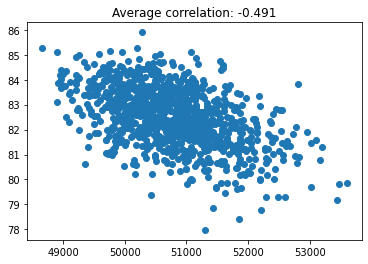

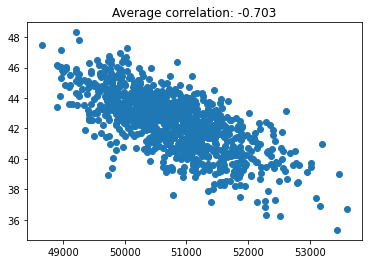

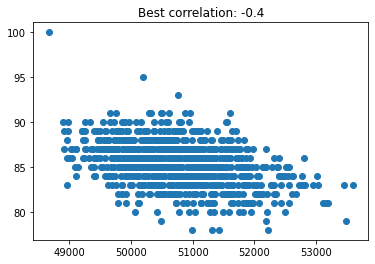

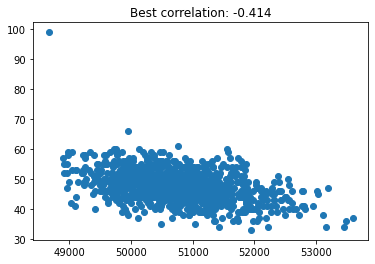

In [54]:
data = np.loadtxt('TSPC.csv', dtype=int, delimiter=';')
summarize_similarity(LSG, data,iter_number=1000)

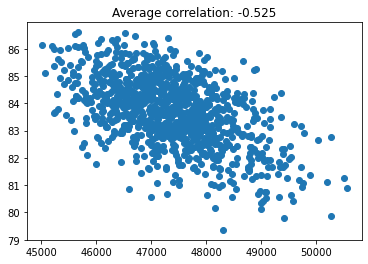

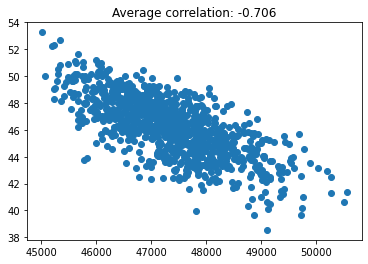

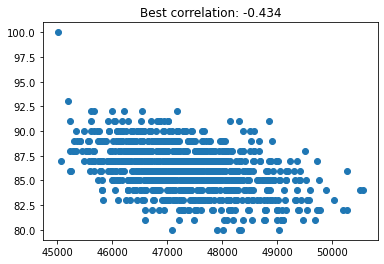

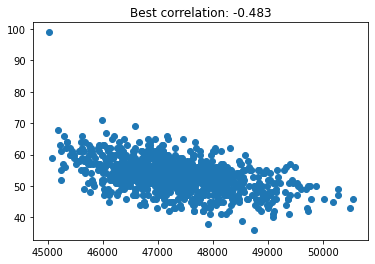

In [55]:
data = np.loadtxt('TSPD.csv', dtype=int, delimiter=';')
summarize_similarity(LSG, data,iter_number=1000)